### Librerias

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

### Parametros de la distribucion Poisson

In [24]:
# Parámetro de la distribución Poisson
mu = 5

# Rango de valores para la distribución original
x = np.arange(0, 16)
dist_poisson = poisson(mu)
pmf_original = dist_poisson.pmf(x)
cdf_original = dist_poisson.cdf(x)

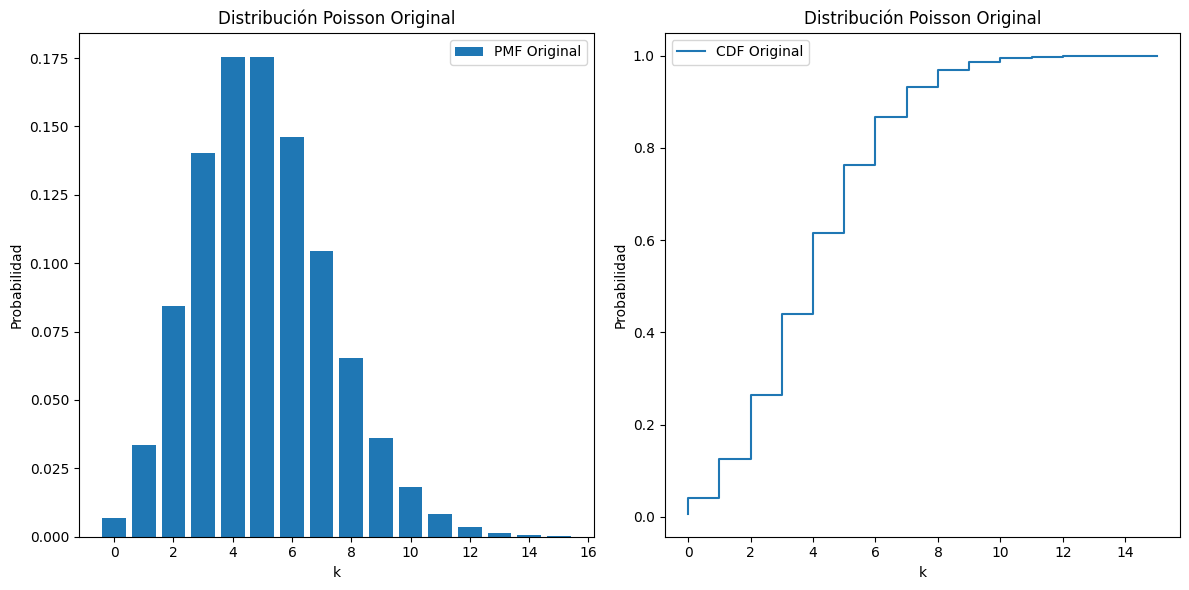

In [25]:
# Graficar la PMF original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x, pmf_original, label="PMF Original")
plt.title("Distribución Poisson Original")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x, cdf_original, label="CDF Original")
plt.title("Distribución Poisson Original")
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.tight_layout()
plt.show()

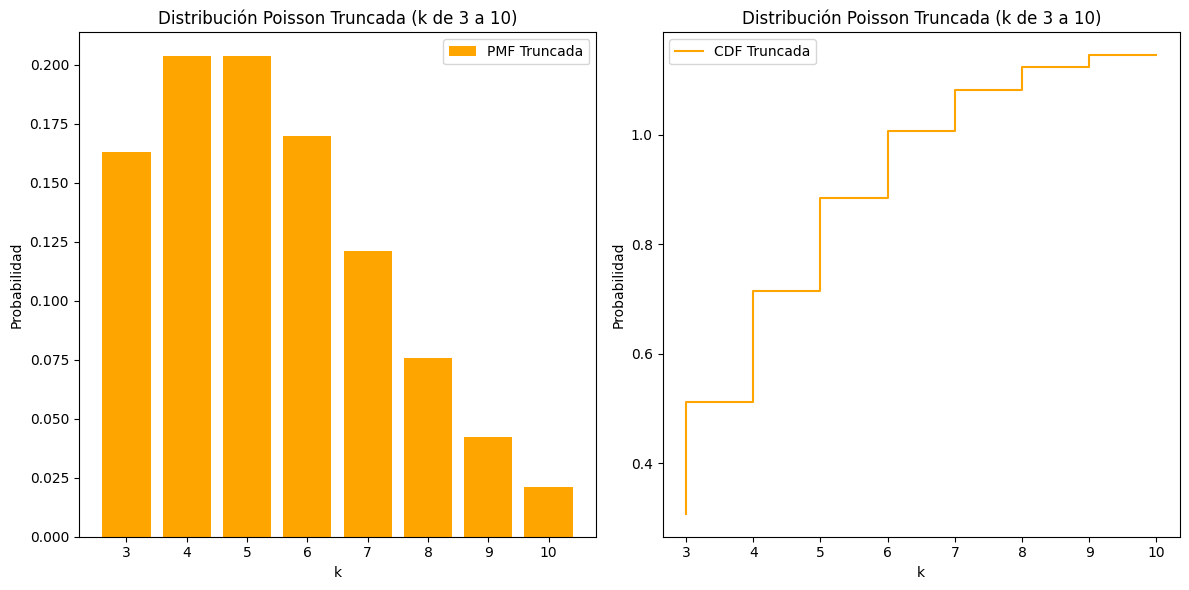

In [26]:

# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento, por ejemplo, de k = 3 a k = 10
k_min = 3
k_max = 10
x_trunc = np.arange(k_min, k_max + 1)

# Calcular la constante de normalización: suma de las probabilidades en el intervalo de truncamiento
norm_const = np.sum(poisson.pmf(x_trunc, mu))

# Crear la PMF truncada re-normalizada
pmf_trunc = poisson.pmf(x_trunc, mu) / norm_const
cdf_trunc = poisson.cdf(x_trunc, mu) / norm_const

# Graficar la PMF truncada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x_trunc, pmf_trunc, label="PMF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_trunc, cdf_trunc, label="CDF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.tight_layout()
plt.show()

[ 3.  4.  5.  6.  7.  8.  9. 10.]


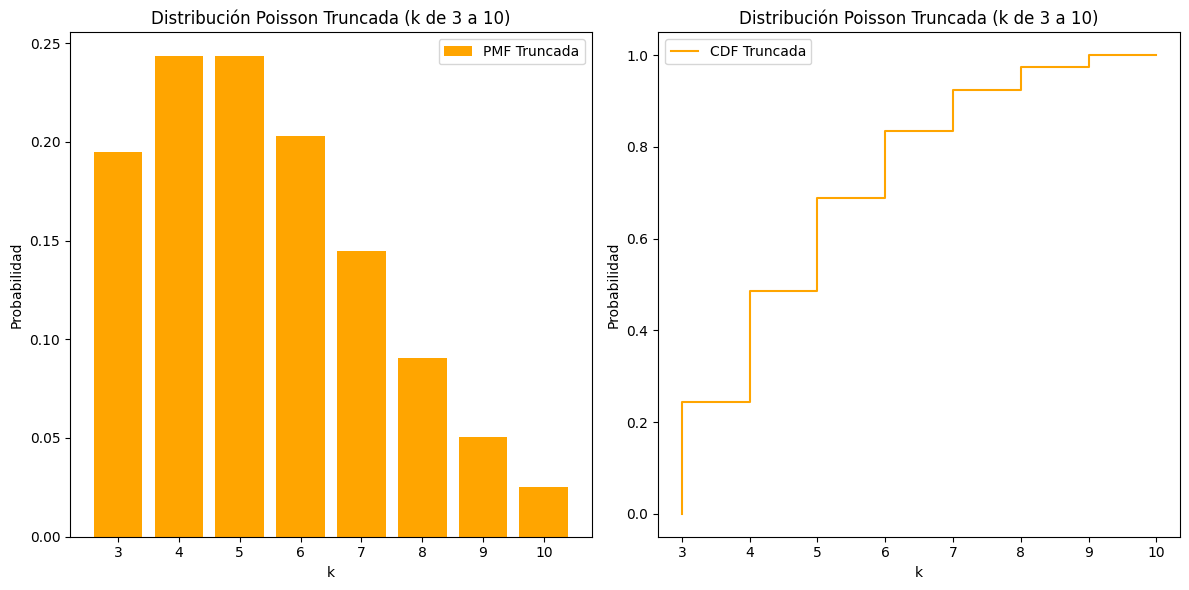

In [27]:

# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento, por ejemplo, de k = 3 a k = 10
k_min = 3
k_max = 10

cdf_min = dist_poisson.cdf(k_min)
cdf_max = dist_poisson.cdf(k_max)
norm_const = cdf_max - cdf_min  # constante de normalización

x_trunc = np.linspace(k_min, k_max, k_max-k_min+1) # rango de valores truncados
print(x_trunc)
pdf_trunc = dist_poisson.pmf(x_trunc) / norm_const
cdf_trunc = (dist_poisson.cdf(x_trunc) - dist_poisson.cdf(k_min)) / norm_const

# Graficar la PMF truncada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(x_trunc, pdf_trunc, label="PMF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.step(x_trunc, cdf_trunc, label="CDF Truncada", color="orange")
plt.title("Distribución Poisson Truncada (k de {} a {})".format(k_min, k_max))
plt.xlabel("k")
plt.ylabel("Probabilidad")
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
# probabilidad con poisson original entre 4 y 8
p_original = dist_poisson.cdf(8) - dist_poisson.cdf(3)
print("Probabilidad en Poisson original (k entre 4 y 8):", p_original)
# probabilidad con poisson truncada entre 4 y 8
p_trunc = ((dist_poisson.cdf(8) - dist_poisson.cdf(k_min)) / norm_const)- ((dist_poisson.cdf(3) - dist_poisson.cdf(k_min)) / norm_const)
print("Probabilidad en Poisson truncada (k entre 4 y 8):", p_trunc)


Probabilidad en Poisson original (k entre 4 y 8): 0.6668804499807901
Probabilidad en Poisson truncada (k entre 4 y 8): 0.9245806685169544


### Propiedades para calcular las probabilidades de una distribucion discreta

1. $P(a<=x<=b)$ = $F(b)$ - $F(a^-)$
2. $P(a<x<b)$ = $F(b^-)$ - $F(a)$
3. $P(a<=x<b)$ = $F(b^-)$ - $F(a^-)$
4. $P(a<x<=b)$ = $F(b)$ - $F(a)$
5. $P(x>=a)$ = 1 - $F(a^-)$
6. $P(x=a)$ = $F(a)$ - $F(a^-)$